# Introduction

This time, again, we will be working with decision trees in order to make a classification predictions.

We will perform the following steps:

1. Load data
2. Divide into training and testing
3. Tune model on training data
4. Final prediction on testing
5. Model visualization

Your task will be to fill parts with 

> ...

Sometimes you'll have to write full code including some functions, sometimes just fill parameters.

# Libraies import

In [50]:
import pandas as pd
import sklearn.model_selection as modsel
import sklearn.metrics as metr
import matplotlib.pyplot as plt
import graphviz 
import sklearn.tree as trees

from sklearn.tree import DecisionTreeClassifier

# Reading data

In [3]:
data = pd.read_csv("./iris.csv")

In [5]:
# Print top 10 rows of a dataset

data. ...

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Divide dataset into X and Y - independent and dependent variables

In [7]:
X, Y = data.drop('species', axis=1), data.species

# Split into training and testing

Remember, that you always have to split data into training and testing part. Testing is left for final evaluation and should not be considered.

* Use **random seed** to ensure that experiment is reproducible!!! We should all get similar reuslts then :D 
* Use test size = 0.2


In [8]:
RANDOM_SEED = 10
TEST_SIZE = 0.2

In [11]:
X_train, X_test, y_train, y_test = modsel.train_test_split(...)

Inspect the data to check if it was splitted correctly?

In [12]:
X_train.shape

(120, 4)

In [13]:
X_test.shape

(30, 4)

In [14]:
y_train.shape

(120,)

In [15]:
y_test.shape

(30,)

Check how many classes of each type to we have in our dataset? It will be important, when we have to select evaluation metric:

* Display information as table - present normalized % share of each class
* Make a pie plot of proportions

In [18]:
...

virginica     0.358333
setosa        0.333333
versicolor    0.308333
Name: species, dtype: float64

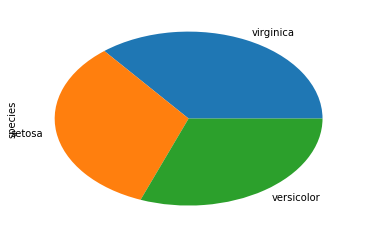

In [22]:
...

Answer a question - are proportions balanced? Can we use accuracy?

# Evaluate decision tree on training set

Use cross-validation to check performance of a decision tree. Play with parmeters to get the best results.

Use different performance metrics to check fit quality!

Remember: **use only training data, not testing - that one should be kept for final evaluation!!!**

In [27]:
dt = DecisionTreeClassifier()
scores = modsel.cross_val_score(dt, X_train, y_train, cv=10)

Display information about achieved scores and make a boxplot

In [34]:
...

count    10.000000
mean      0.909382
std       0.098867
min       0.666667
25%       0.909091
50%       0.919872
75%       0.980769
max       1.000000
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x17c217a29b0>],
 'caps': [<matplotlib.lines.Line2D at 0x17c21d663c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x17c21b14080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x17c21d66c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x17c217a2b00>,
  <matplotlib.lines.Line2D at 0x17c217a2f60>]}

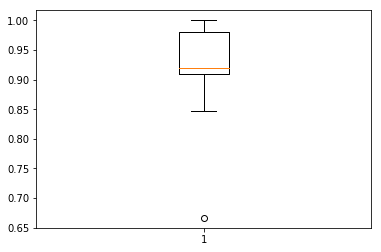

In [36]:
plt.boxplot(scores)

You can choose parameters manually or optimize them using grid search

In [ ]:
DecisionTreeClassifier()

In [ ]:
params_grid = {
    'max_depth': [ ... ], 
    'min_samples_split': [2], 
    'min_samples_leaf': [1], 
    'max_features': [None, ...] 
}

In [39]:
grid_search = modsel.GridSearchCV(...)

Grid search behaves like a model - you can fit it **to the training data**

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_features': [None, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Check best params:

In [ ]:
grid_search. ...

In [41]:
best_model = grid_search.best_estimator_

# Final prediction on test data

Now we're ready to test our model on **test dataset**. This should be our last operation.

In [42]:
results = ...

Check metrics:

In [44]:
accuracy = ...
accuracy

Let's visualize our final decision tree!

In [57]:
dot_data = trees.export_graphviz(best_model, out_file='result_tree.dot') 
# Open file result_tree.dot and copy-paste its content on this website: http://webgraphviz.com/

Those people, who work on their own laptops with MacOS/Linux, can download **graphviz** and install it:

```{bash}
pip install grapviz

sudo apt-get install graphviz
```

And then execute normally:

```{python}

import graphviz 
dot_data = trees.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
```
